# Weather Prediction Analysis (Rain, No Rain)
Dataset having 6 columns (Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain)

# Importing required Librarires

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Importing Dataset

In [2]:
data= pd.read_csv('weather_forecast_data.csv')
data

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


# Data Understanding

In [3]:
print(data.head())
print(data.tail())
r, c=data.shape
print('rows ',r,' Columns ',c)
print(data.size)
print(data.describe())
print(data.columns)
print(data.info())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614189  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain
      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain
rows  2500  Columns  6
15000
       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count 

# Checking for Null Values

In [4]:
print(data.isnull().sum())

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


Null values are not present in dataset.

# Converting Object datatype to numeric

In [5]:
data['Rain']=data['Rain'].replace(['rain','no rain'],[0,1])
data

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,0
1,27.879734,46.489704,5.952484,4.990053,992.614189,1
2,25.069084,83.072843,1.371992,14.855784,1007.231620,1
3,23.622080,74.367758,7.050551,67.255282,982.632013,0
4,20.591370,96.858822,4.643921,47.676444,980.825142,1
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,1
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,1
2497,28.108274,43.817178,2.897128,75.842952,999.119187,1
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,1


# Data Visualization 

Heatmap for Corelation

<Axes: >

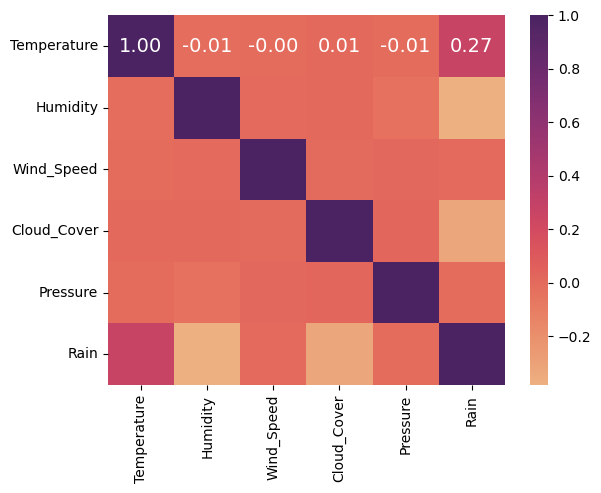

In [6]:
sns.heatmap(data.corr(), cmap="flare", fmt='.2f',annot=True, annot_kws={"size": 14})


Count values in ouput variable

Rain
1    2186
0     314
Name: count, dtype: int64


<Axes: xlabel='Rain', ylabel='count'>

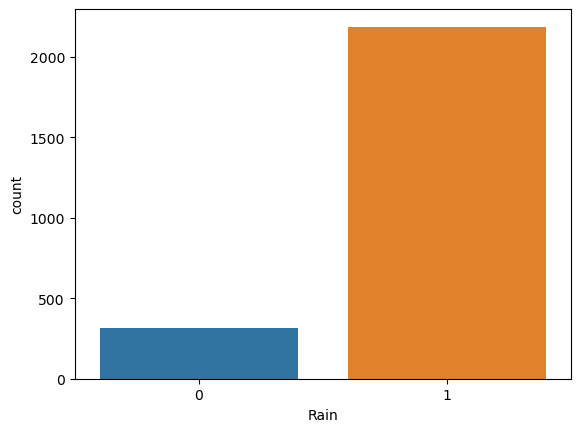

In [7]:
print(data['Rain'].value_counts())
sns.countplot(x='Rain', data=data)

Ploting Histogram for all features

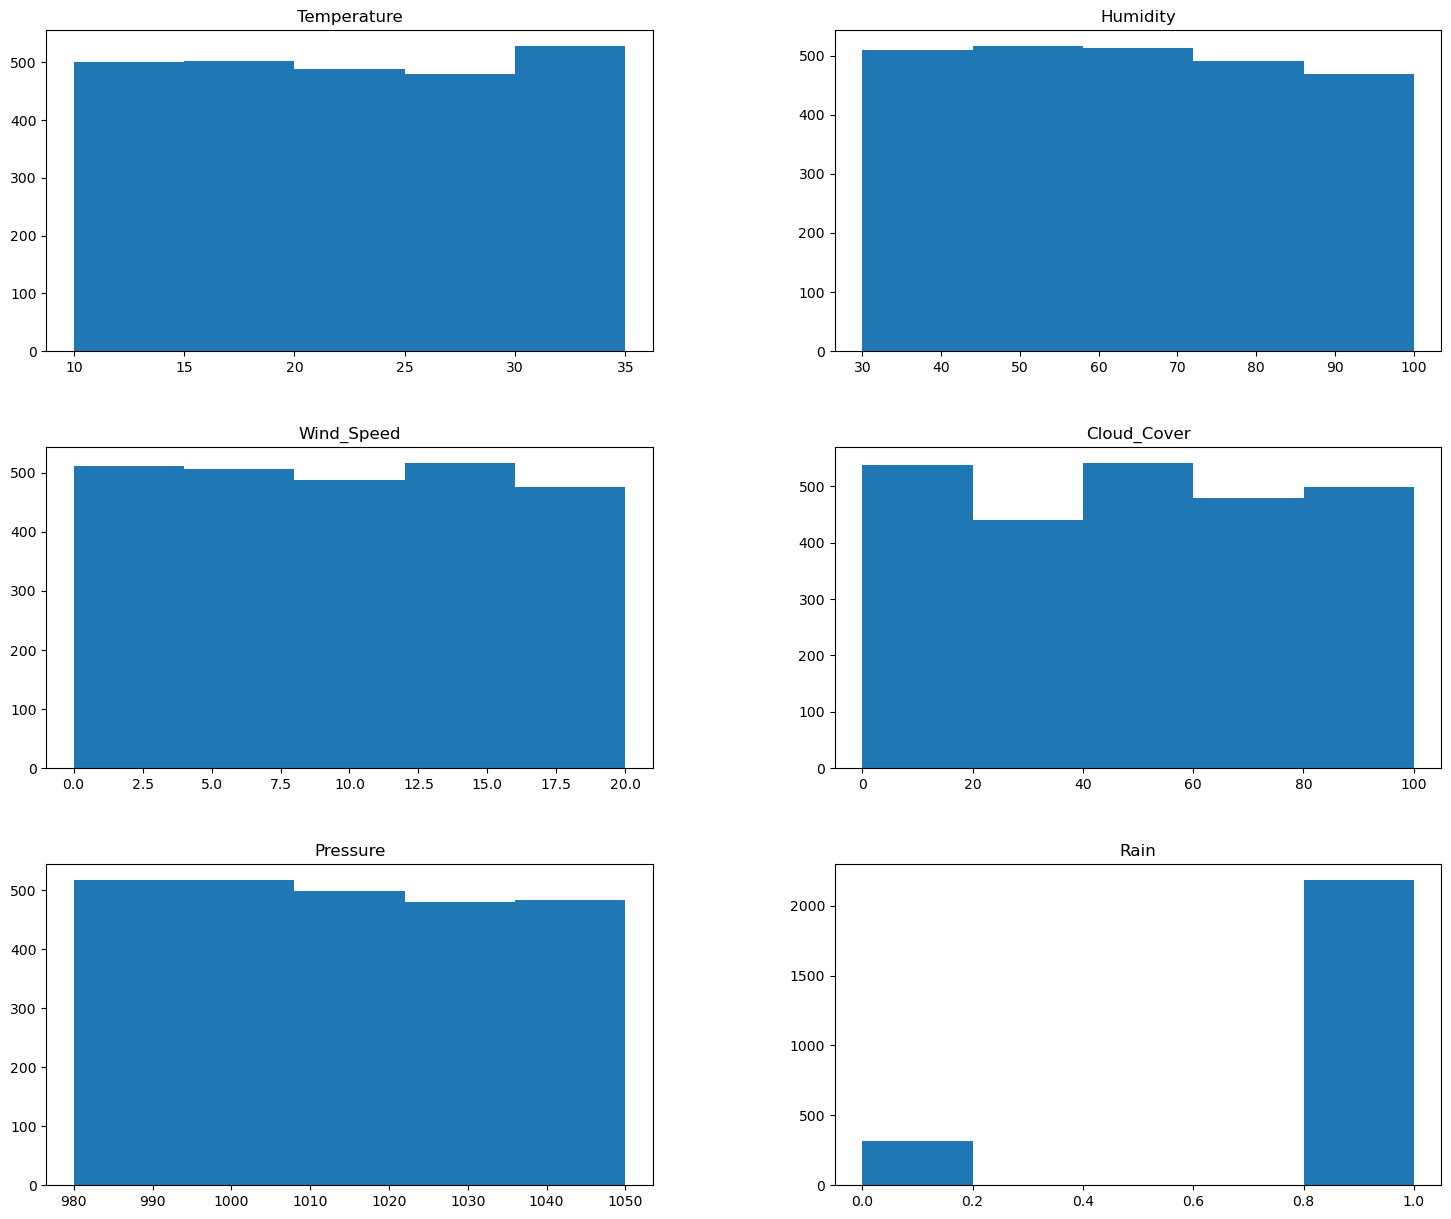

In [8]:
data.hist(figsize=(18, 15), bins=5, grid=False)
plt.show()

# Spliting data into X & Y 

In [9]:
x=data.drop(['Rain'], axis=1)
y=data['Rain']

# Spliting data into training data and testing data

In [10]:
x_train, x_test,y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=10)
print(len(x_train))
print(len(x_test))

2000
500


# Model Training

As output variable is Binary, so we can use classification Approach (Logistic Regression, RandomForest, XGBooost)

# Logistic Regressioon

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 

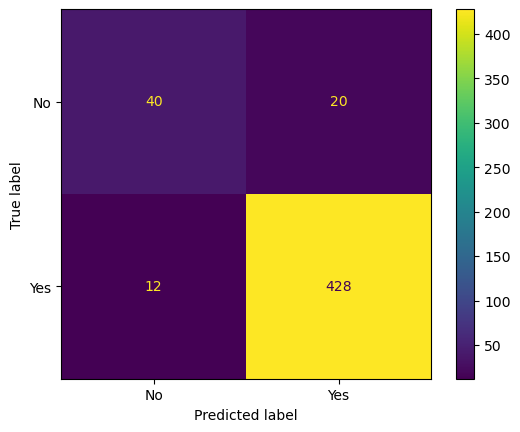

In [11]:
#loading model
model=LogisticRegression()
#training model
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
print(y_predict)

#Evaluation
print(f"Accuracy score: { round(accuracy_score(y_test, y_predict)*100, 4) }")
#ConfusionMatrix
cm=confusion_matrix(y_test, y_predict, labels=model.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
cm_display.plot()

#to check the score of the data or accuracy of the data
print('Testing Accuracy ',round(model.score(x_test,y_test)*100, 4))
print('Training Accuracy ',round(model.score(x_train,y_train)*100, 4))
#As testing and training accuracy are almost similar so, model is well generalized (balance between overfitting and underfitting)


# RandomForest

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 

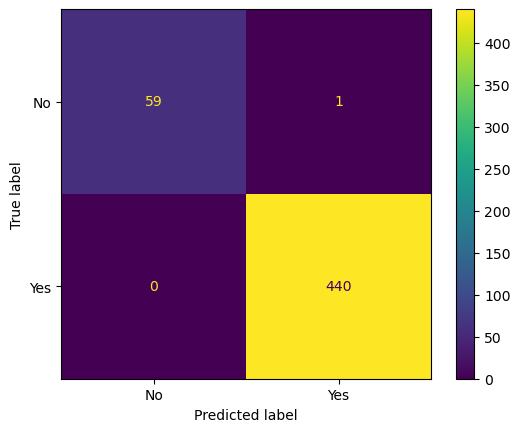

In [12]:
#loading model
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
model = Pipeline(steps=[['smote', smote_sampler], ['classifier', rf_clf]])
#training model
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

#Evaluation
print(f"Accuracy score: { round(accuracy_score(y_test, y_predict)*100, 4) }")
#ConfusionMatrix
cm=confusion_matrix(y_test, y_predict, labels=model.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
cm_display.plot()

#to check the score of the data or accuracy of the data
print('Testing Accuracy ',round(model.score(x_test,y_test)*100, 4))
print('Training Accuracy ',round(model.score(x_train,y_train)*100, 4))
#As testing and training accuracy are almost similar so, model is well generalized (balance between overfitting and underfitting)


# XGBoost Classifier

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 

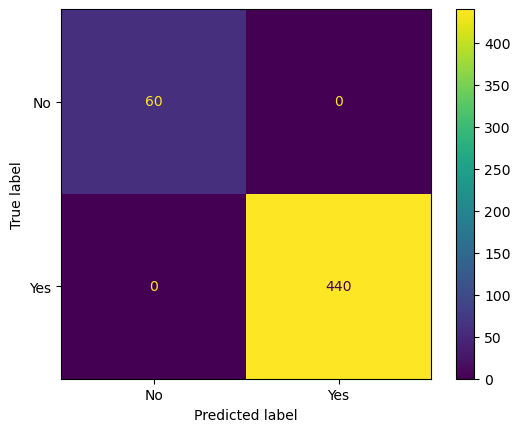

In [13]:
#loading model
model=XGBClassifier()
#training model
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
print(y_predict)

#Evaluation
print(f"Accuracy score: { round(accuracy_score(y_test, y_predict)*100, 4) }")
#ConfusionMatrix
cm=confusion_matrix(y_test, y_predict, labels=model.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
cm_display.plot()

#to check the score of the data or accuracy of the data
print('Testing Accuracy ',round(model.score(x_test,y_test)*100, 4))
print('Training Accuracy ',round(model.score(x_train,y_train)*100, 4))
#As testing and training accuracy are similar so, model is well generalized (balance between overfitting and underfitting)


Accuracy of model from logisticRegression = 93, RandomForest = 99 and XGBoost Classifier = 100.        
Conclude:- As XGBoost Classifier is giving maximum accuracy, its prediction is more accurate as compared to other models.